In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import string
from string import punctuation, digits
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
data = pd.read_csv('/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv')

In [4]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5616 non-null   int64 
 1   user_name         5616 non-null   object
 2   user_location     4445 non-null   object
 3   user_description  5262 non-null   object
 4   user_created      5616 non-null   object
 5   user_followers    5616 non-null   int64 
 6   user_friends      5616 non-null   int64 
 7   user_favourites   5616 non-null   int64 
 8   user_verified     5616 non-null   bool  
 9   date              5616 non-null   object
 10  text              5616 non-null   object
 11  hashtags          4200 non-null   object
 12  source            5615 non-null   object
 13  retweets          5616 non-null   int64 
 14  favorites         5616 non-null   int64 
 15  is_retweet        5616 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 625.3+ KB


In [6]:
data.isnull().sum()

id                     0
user_name              0
user_location       1171
user_description     354
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1416
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [7]:
data.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [8]:
data.drop(['id', 'user_name','user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis=1,inplace=True)

In [9]:
text = data['text']
text

0       Same folks said daikon paste could treat a cyt...
1       While the world has been on the wrong side of ...
2       #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3       Facts are immutable, Senator, even when you're...
4       Explain to me again why we need a vaccine @Bor...
                              ...                        
5611    Neutralization geometric mean titers (GMTs) of...
5612    I just got my 1st dose of #PfizerBiontech #COV...
5613    Fully vaccinated and high af. #PfizerBiontech ...
5614    The planned shipment of #PfizerBiontech #vacci...
5615    Video #Newsmexico A #Mexican suffers seizures ...
Name: text, Length: 5616, dtype: object

# Text Processsing

In [10]:
def process_text(text):
    """
    process the text by removing extra words, punctuations, 
    numbers and tokenize the word vector
    """
    
    words = '' 
    ############################################################################
    for val in text:
        
        #remove numbers
        rm_num = ''.join(char for char in val if not char.isdigit())
        #remove puntuations
        rm_pun = ''.join(char for char in rm_num if char not in punctuation)
        
        # split the value 
        tokens = rm_pun.split() 
    
        # Converts each token into lowercase 
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower() 
    
        #exclude the extra words
        words += " ".join(word for word in tokens if word not in stopwords.words('english'))+" "
    ###############################################################################
    return words

In [11]:
tweets = process_text(text)

In [12]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', colormap = 'coolwarm',
                stopwords = stopwords, 
                min_font_size = 10).generate(tweets) 
  

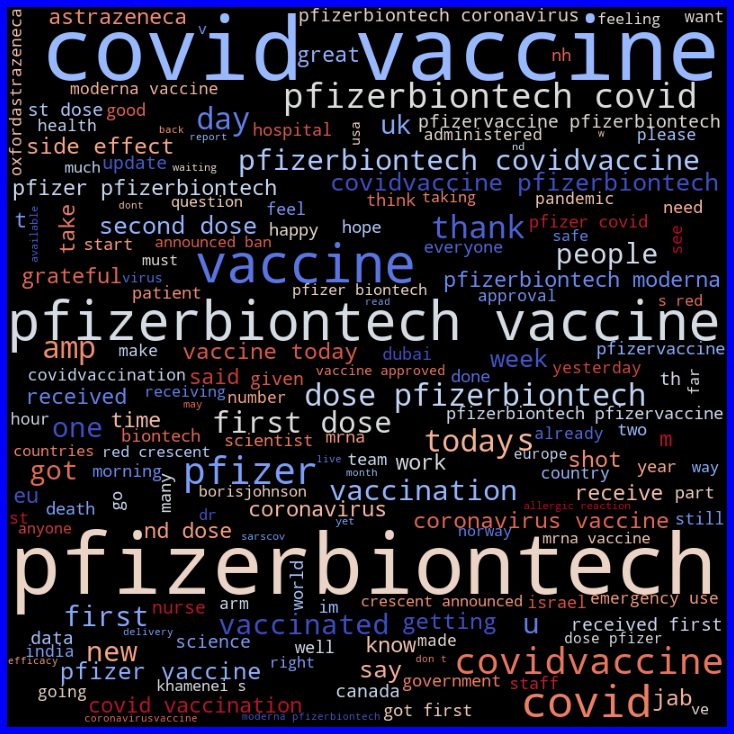

In [13]:
plt.figure(figsize = (16, 10), facecolor = 'blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# VADER Sentiment Analyser

In [14]:
SIA = SentimentIntensityAnalyzer()
data['scores'] = data['text'].apply(lambda text: SIA.polarity_scores(text))

In [15]:
data

,text,scores
0,Same folks said daikon paste could treat a cyt...,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp..."
1,While the world has been on the wrong side of ...,"{'neg': 0.125, 'neu': 0.766, 'pos': 0.109, 'co..."
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp..."
3,"Facts are immutable, Senator, even when you're...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Explain to me again why we need a vaccine @Bor...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...
5611,Neutralization geometric mean titers (GMTs) of...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5612,I just got my 1st dose of #PfizerBiontech #COV...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5613,Fully vaccinated and high af. #PfizerBiontech ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5614,The planned shipment of #PfizerBiontech #vacci...,"{'neg': 0.249, 'neu': 0.751, 'pos': 0.0, 'comp..."


In [16]:
def compute_score(c):
    if c > 0.0:
        return 'positive'
    elif c == 0:
        return 'neutral'
    else:
        return 'negative'

In [17]:
data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])                                           


In [18]:
data['compound_score'] = data['compound'].apply(lambda c :compute_score(c))

In [19]:
data.head()

,text,scores,compound,compound_score
0,Same folks said daikon paste could treat a cyt...,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.4019,positive
1,While the world has been on the wrong side of ...,"{'neg': 0.125, 'neu': 0.766, 'pos': 0.109, 'co...",-0.1027,negative
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",0.2500,positive
3,"Facts are immutable, Senator, even when you're...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,Explain to me again why we need a vaccine @Bor...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='compound_score', ylabel='count'>

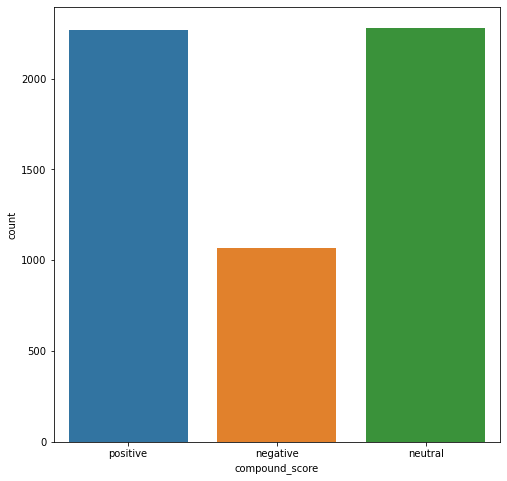

In [20]:
plt.figure(figsize = (8,8), facecolor = 'white') 
sns.countplot(data['compound_score'])